In [70]:
# Import modules
from pytrends.request import TrendReq
import math
import os
import random
# Watch out for assert_frame_equal, independent imported
import pandas_datareader as web
from pandas.util.testing import assert_frame_equal
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import date, datetime

In [195]:
def get_stock_hist(ticker, datasource, start, end=date.today()):
    df = web.DataReader(ticker, data_source=datasource, start=start, end=end)
    return df

close_list = []

stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'WMT']

for stock in stocks:
    df = get_stock_hist(stock, 'yahoo', '2015-07-05')['Close']
    df_week_close = df.reindex(pd.date_range( start=df.index.min( ),
                           end=df.index.max( ),
                           freq='W-MON' ) )  # weekly, Wednesdays
    close = list(df_week_close)
    close_list.append(close)

print(close_list)

[[129.6199951171875, 124.5, 121.30000305175781, 115.5199966430664, 115.95999908447266, 105.76000213623047, 113.29000091552734, 109.2699966430664, 114.20999908447266, 113.44999694824219, 114.70999908447266, 110.37999725341797, 112.12000274658203, 111.04000091552734, 119.08000183105469, 119.5, 121.05999755859375, 112.33999633789062, 119.30000305175781, 117.80999755859375, 119.02999877929688, 113.18000030517578, 106.02999877929688, nan, nan, 96.95999908447266, 97.12999725341797, 101.41999816894531, 97.33999633789062, 94.0199966430664, 93.98999786376953, 96.04000091552734, 96.91000366210938, 103.01000213623047, 102.26000213623047, 105.91999816894531, nan, 109.98999786376953, 108.66000366210938, 109.8499984741211, 105.68000030517578, 93.73999786376953, 92.72000122070312, 90.5199966430664, 95.22000122070312, 100.3499984741211, 97.91999816894531, 98.83000183105469, 95.33000183105469, 93.4000015258789, 95.88999938964844, 96.68000030517578, 98.77999877929688, 98.66000366210938, 104.209999084472

In [196]:
pytrends = TrendReq()

kw_list = ["apple", "google", "microsoft", "amazon", "facebook"]
pytrend.build_payload(kw_list)

df_trend = pytrend.interest_over_time()
df_trend

,apple,google,microsoft,amazon,facebook,isPartial
date,,,,,,
2015-07-05,4,46,2,9,99,False
2015-07-12,4,46,2,10,99,False
2015-07-19,4,47,2,9,99,False
2015-07-26,3,47,2,9,100,False
2015-08-02,3,48,2,9,99,False
...,...,...,...,...,...,...
2020-05-31,4,32,2,13,30,False
2020-06-07,4,31,2,13,30,False
2020-06-14,4,30,2,13,29,False


0.13327934625325244
-0.7569360496973565
-0.1419106068242254
0.5302918865835022
-0.8615536628944851


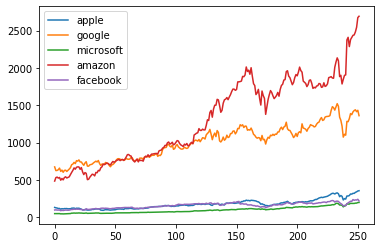

In [197]:
import scipy

trend_list = [list(df_trend['apple']), list(df_trend['google']), list(df_trend['microsoft']), 
              list(df_trend['amazon']), list(df_trend['facebook'])]

name_list = ['apple', 'google', 'microsoft', 'amazon', 'facebook']

for n in range(len(close_list)):
    nclose, ntrend = [], []
    for i in range(len(close_list[n])):
        if not math.isnan(close_list[n][i]):
            nclose.append(close_list[n][i])
            ntrend.append(trend_list[n][i])
    correlation, p_value = scipy.stats.pearsonr(nclose, ntrend)
    print(correlation)
    plt.plot(nclose)
        
plt.legend(name_list)

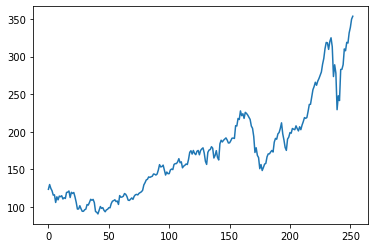

In [155]:
plt.plot(nclose)